In [1]:
import polars as pl 
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import date
from statannotations.Annotator import Annotator
from itertools import combinations
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
nbse_df_path = Path('/projectnb/vkolagrp/bellitti/clinicalnotes-databasing-validated/results/NBSE_tabulated.parquet')
nbse_df = pl.read_parquet(nbse_df_path)

In [3]:
(
    nbse_df.filter(pl.col("completed") > date(2020, 3, 1))
    .select(
        "encounter_type", pl.col("moca_total_score").is_not_null().alias("has_moca")
    )
    .drop_nulls()
    .group_by(pl.all())
    .len()
    .sort("encounter_type", "has_moca", descending=True)
)

encounter_type,has_moca,len
str,bool,u32
"""telephone""",true,486
"""telephone""",false,53
"""in-person""",true,597
"""in-person""",false,73
"""VVC""",true,154
"""VVC""",false,31


In [15]:
nbse_df.filter(pl.col('cerad_encoding_total') > 30)

completed,age,sex,education,encounter_type,moca_total_score,mmse_total_score,aces_total_score,cerad_encoding_total,cerad_delayed_recall,cerad_corrected_recognition_total,trailsa_time_in_seconds,trailsa_errors,trailsb_time_in_seconds,trailsb_errors,letter_fluency_total,category_fluency_total,boston_naming_total_score,verbal_naming_total_score,medications,adl_impaired,iadl_impaired,diagnosis,clinical_syndrome,neuropsychological_testing_recommended,pet_recommended,filename,VAC
date,i64,str,i64,str,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i64,i64,i64,i64,list[str],bool,bool,str,str,bool,bool,str,i64
2022-03-21,72,"""male""",14,"""telephone""",19,30,null,40,7,11,44.32,0,194.35,1,24,32,9,null,"[""Apixaban 5 mg"", ""Omeprazole 20 mg"", … ""Bupropion HCL 150 mg""]",false,false,"""Mild Cognitive Impairment (MCI…","""progressive amnestic dysfuncti…",false,true,"""VAC1360_MM.aeb.json""",1360
2019-10-23,70,"""male""",17,"""in-person""",null,26,null,31,7,14,31.0,0,72.0,1,38,44,12,null,null,false,false,"""Mild Cognitive Impairment (MCI…","""Mild Cognitive Impairment (MCI…",null,true,"""VAC 815 AVR.aeb.json""",815


In [8]:
nbse_df.sample()

completed,age,sex,education,encounter_type,moca_total_score,mmse_total_score,aces_total_score,cerad_encoding_total,cerad_delayed_recall,cerad_corrected_recognition_total,trailsa_time_in_seconds,trailsa_errors,trailsb_time_in_seconds,trailsb_errors,letter_fluency_total,category_fluency_total,boston_naming_total_score,verbal_naming_total_score,medications,adl_impaired,iadl_impaired,diagnosis,clinical_syndrome,neuropsychological_testing_recommended,pet_recommended,filename,VAC
date,i64,str,i64,str,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i64,i64,i64,i64,list[str],bool,bool,str,str,bool,bool,str,i64
2019-12-05,79,"""male""",10,"""in-person""",19,28,null,16,5,9,113.0,0,300.0,5,17,27,3,null,"[""trospium cl 20mg"", ""aspirin 90mcg"", … ""acetaminophen 500mg""]",false,false,"""Mild Cognitive Impairment (MCI…","""executive dysfunction""",true,null,"""VAC 839_JD_AVR.aeb.json""",839


In [17]:
import numpy as np

TEL vs. F2F: Welch's t-test independent samples with Bonferroni correction, P_val:8.977e-03 t=-2.975e+00
F2F vs. VVC: Welch's t-test independent samples with Bonferroni correction, P_val:1.259e-01 t=2.044e+00
TEL vs. VVC: Welch's t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=1.192e-01
TEL vs. F2F: Welch's t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=1.394e-01
F2F vs. VVC: Welch's t-test independent samples with Bonferroni correction, P_val:5.670e-01 t=-1.318e+00
TEL vs. VVC: Welch's t-test independent samples with Bonferroni correction, P_val:6.765e-01 t=-1.215e+00
TEL vs. F2F: Welch's t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=9.472e-01
F2F vs. VVC: Welch's t-test independent samples with Bonferroni correction, P_val:1.587e-04 t=-4.115e+00
TEL vs. VVC: Welch's t-test independent samples with Bonferroni correction, P_val:2.731e-03 t=-3.351e+00
TEL vs. F2F: Welch's t-test independent samples with Bonfer

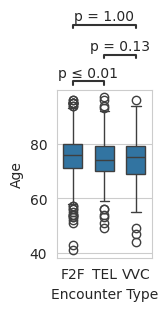

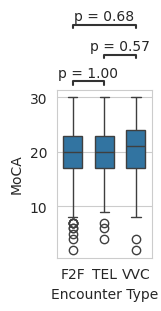

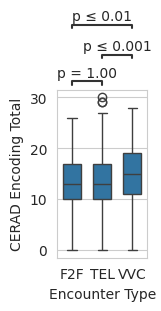

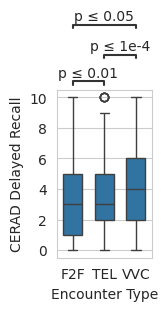

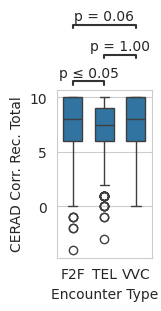

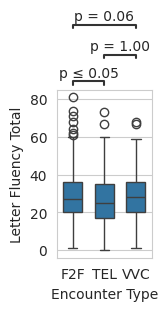

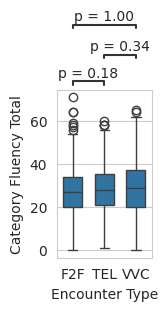

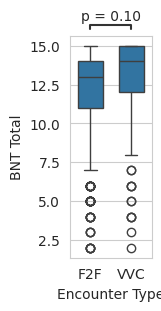

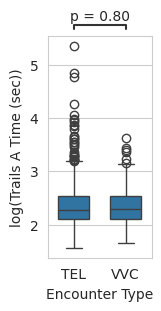

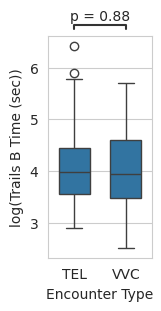

In [43]:
tests = [
    "age",
    "moca_total_score",
    "cerad_encoding_total",
    "cerad_delayed_recall",
    "cerad_corrected_recognition_total",
    "letter_fluency_total",
    "category_fluency_total",
    "boston_naming_total_score",
    "trailsa_time_in_seconds",
    "trailsb_time_in_seconds",
]

tests_readable = {
    "age": "Age",
    "moca_total_score" : "MoCA",
    "cerad_encoding_total": "CERAD Encoding Total",
    "cerad_delayed_recall": "CERAD Delayed Recall",
    "cerad_corrected_recognition_total": "CERAD Corr. Rec. Total",
    "letter_fluency_total": "Letter Fluency Total",
    "category_fluency_total": "Category Fluency Total",
    "boston_naming_total_score": "BNT Total",
    "trailsa_time_in_seconds": "log(Trails A Time (sec))",
    "trailsb_time_in_seconds": "log(Trails B Time (sec))",
}

for test in tests:
    _df = (
        nbse_df.select(
            "VAC",
            test,
            pl.col("encounter_type").replace({"in-person": "F2F", "telephone": "TEL"}),
        )
        .drop_nulls(subset=("encounter_type", test))
        .to_pandas()
    )

    order = ["F2F", "TEL", "VVC"]

    if 'trails' in test:
        _df = _df[_df['encounter_type'] != 'F2F']
        _df[test] = np.log(_df[test])
        order = ["TEL", "VVC"]

    if 'boston' in test:
        _df = _df[_df['encounter_type'] != 'TEL']
        order = ["F2F", "VVC"]

    if 'cerad' in test:
        _df = _df[~_df['VAC'].isin([815,1360,1428])]

    pairs = [pair for pair in combinations(_df["encounter_type"].unique(), 2)]

    fig, ax = plt.subplots(1, 1, figsize=(1.5, 3), layout='constrained')


    # sns.violinplot(_df, x="encounter_type", y=test, ax=ax, cut=0, split=True, width=0.9,fill=True,inner='quart')
    sns.boxplot(_df, x="encounter_type", y=test, ax=ax, width=0.6,order=order)

    annotator = Annotator(ax, pairs, data=_df, x="encounter_type", y=test)
    annotator.configure(
        test="t-test_welch",
        text_format="simple",
        loc="outside",
        show_test_name=False,
        comparisons_correction="bonferroni",
    )  # fdr_bh
    annotator.apply_and_annotate()

    ax.set_ylabel(tests_readable[test])
    ax.set_xlabel("Encounter Type")

    # plt.savefig(f'../figures/{test}_encounter_type.png',bbox_inches='tight')

In [23]:
nbse_df.sample()

completed,age,sex,education,encounter_type,moca_total_score,mmse_total_score,aces_total_score,cerad_encoding_total,cerad_delayed_recall,cerad_corrected_recognition_total,trailsa_time_in_seconds,trailsa_errors,trailsb_time_in_seconds,trailsb_errors,letter_fluency_total,category_fluency_total,boston_naming_total_score,verbal_naming_total_score,medications,adl_impaired,iadl_impaired,diagnosis,clinical_syndrome,neuropsychological_testing_recommended,pet_recommended,filename,VAC
date,i64,str,i64,str,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i64,i64,i64,i64,list[str],bool,bool,str,str,bool,bool,str,i64
2020-10-02,87,"""male""",14,"""telephone""",11,null,17,13,2,5,8.96,0,46.5,0,19,19,null,42,"[""Furosemide 20mg"", ""Docusate NA 100mg"", … ""Cod Liver oil cap""]",false,true,"""Mild Dementia""","""amnestic mci""",null,null,"""VAC 996 GM DA.aeb.json""",996


TEL vs. F2F: Welch's t-test independent samples, P_val:8.892e-01 t=1.394e-01
F2F vs. VVC: Welch's t-test independent samples, P_val:1.890e-01 t=-1.318e+00
TEL vs. VVC: Welch's t-test independent samples, P_val:2.255e-01 t=-1.215e+00


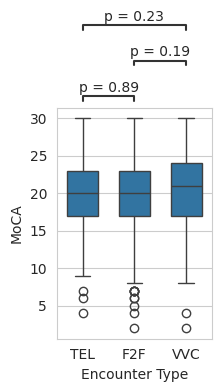

In [ ]:
_df = nbse_df.select(
    'VAC',
    'age',
    'sex',
    'moca_total_score',
    pl.col('encounter_type').replace({'in-person':'F2F','telephone':'TEL'})
).drop_nulls(subset=('encounter_type','moca_total_score')).to_pandas()
#.unpivot(on=['moca_total_score','mmse_total_score'],variable_name='test',value_name='score',index=['VAC','age','sex','encounter_type'])

pairs = [pair for pair in combinations(_df['encounter_type'].unique(),2)]

fig,ax = plt.subplots(1,1,figsize=(2,3))

order = ['F2F','TEL', 'VVC']

sns.boxplot(
    _df,
    x='encounter_type',
    y='moca_total_score',
    ax=ax,
    width=0.6
)

annotator = Annotator(ax, pairs, data=_df, x='encounter_type', y='moca_total_score')
annotator.configure(test='t-test_welch',text_format='simple', loc='outside',show_test_name=False)
annotator.apply_and_annotate()

ax.set_ylabel('MoCA')
ax.set_xlabel('Encounter Type')

plt.savefig('../figures/moca_encounter_type.png',bbox_inches='tight')